In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy.special as spec
import scipy.optimize
import scipy.stats as stat

%matplotlib inline

Text(763.8, 0, 'Plateau Voltage')

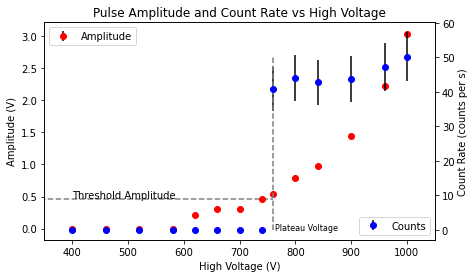

In [92]:
V=np.array([400,460,520,580,620,660,700,740,760,800,840,900,960,1000])
amp=np.array([0,0,0,0,0.22,.3,.304,.464,.544,.784,.976,1.44,2.22,3.04])
counts=np.array([0,0,0,0,0,0,0,0,612,659,642,700,708,953])
time=np.array([15,15,15,15,15,15,15,15,15,15,15,16,15,19])
rate=counts/time

sigma_amp=.02
sigma_rate=np.sqrt(rate)

plateau_voltage= 760
threshold_amp=.464

figure= plt.figure(figsize=(7,4))
ax1=figure.add_subplot(111)
plt.errorbar(V,amp,yerr=sigma_amp, ecolor="black", fmt="ro", mfc='red', label='Amplitude')
plt.title('Pulse Amplitude and Count Rate vs High Voltage')
plt.ylabel('Amplitude (V)')
plt.xlabel('High Voltage (V)')
plt.text(min(V), threshold_amp + .02*threshold_amp, 'Threshold Amplitude')
plt.legend(loc=2)
plt.hlines(threshold_amp,0,plateau_voltage, color='grey',linestyle='--')
ax2 = ax1.twinx()
plt.errorbar(V,rate,yerr=sigma_rate, ecolor="black", fmt="ro", mfc='blue',mec='blue', label='Counts')
plt.ylabel('Count Rate (counts per s)')
plt.xlim(350, 1050)
plt.legend(loc=4)

plt.vlines(plateau_voltage,0,max(rate),color='grey',linestyle='--')
plt.text(plateau_voltage + .005*plateau_voltage,0, 'Plateau Voltage', fontsize=8)

[ 4  2  9  7 17 11 13 12 11  7  5  1  1  1  0  0  1]
[ 3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
17.852581936567944
Power_divergenceResult(statistic=17.85258193656794, pvalue=2.386951817449165e-05)
15
17


Text(0, 0.5, 'Frequency of Count Rate')

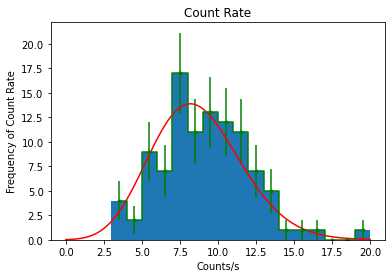

In [99]:
r = np.array([6,6,10,9,11,13,11,16,7,9,
              8,7,7,5,12,5,9,5,11,11,
              12,8,7,6,10,13,4,12,10,
              7,7,11,13,12,8,7,6,10,7,
              8,10,13,8,7,9,3,5,3,12,
              15,12,11,10,7,9,10,9,8,11,
              10,11,3,9,3,7,9,6,8,6,
              5,13,7,9,7,14,9,10,9,10,
              7,10,4,8,9,12,11,5,10,7,
              5,6,7,8,9,8,5,11,7,5,8,11,20],dtype=int)
#20
B = len(n)
mean = np.mean(r)

hist = np.histogram(r, bins=B)
n= hist[0]
m = np.array(hist[1][0:-1],dtype=int)
u = np.linspace(0,20,1000)
factm = np.array([spec.factorial(m)],dtype=int)
#m = hist[1][0:-1]
error= np.sqrt(n)

print(n)
print(m)
#print(p)
#print(error)

#poisson = sum(n)*np.exp(-mean)*(mean**m)/spec.factorial(m)
poisson = len(r)*np.exp(-mean)*(mean**m)/spec.factorial(m)
#p = np.exp(-mean)*(mean**m)/spec.factorial(m)
plotp = sum(n)*np.exp(-mean)*(mean**u)/spec.factorial(u)

#N = np.array(sum(n[0:2]))
#N = np.append(N,n[2:10])
#N = np.append(N,sum(n[10:]))
#
#P = np.array(sum(n[0:2]), dtype='float')
#P = np.append(N,n[2:10])
#P = np.append(N,sum(n[10:]))
#histerror= np.sqrt(poisson)
#plt.errorbar(B, hist, yerr=histerror*hist, fmt='.')
df = len(n)-2
X_sq = sum(((n-poisson)**2)/poisson)


#X = stat.chisquare(n,f_exp = poisson, ddof=15)
#X = stat.chisquare(n,f_exp = poisson, ddof=df)

print(X_sq)
print(X)
print(df)
print(B)



plt.hist(r, bins=B)
plt.errorbar(
    m+.5    ,
    n,
    yerr = n**0.5,
    marker = '.',
    drawstyle = 'steps-mid',
    color = 'green'
)
plt.plot(u, plotp, color='red')

plt.title('Count Rate')
plt.xlabel('Counts/s')
plt.ylabel('Frequency of Count Rate')




In [5]:
#dead time
HV=880
tV=450

bgc=103
bgt=230
acounts=3946
atime=11

bcounts=3481
btime=12
abcounts=6078
abtime=11

[2.4626506  1.28957529 0.81914031 0.51583248 0.408483  ] [1.56928347 1.13559469 0.9050637  0.71821479 0.63912674] [ 6.75011228 14.17036489 21.52034137 35.76539928 49.80258102]
param 0  =  4.272849979527452 +/- 6.3630002745078516
param 1  =  0.1093117064029969 +/- 0.16672459480731677
param 2  =  0.4063761231543297 +/- 0.6195259110608115
Chi-square, degrees of freedom, reduced chi-square:  0.002342072202698089 2 0.0011710361013490445
p-test value :  0.9988296492938593
2
0.0023618307978873474


<ipython-input-100-6dd45df86c84>:14: RuntimeWarning: overflow encountered in exp
  return A*np.exp(-x*B)+C


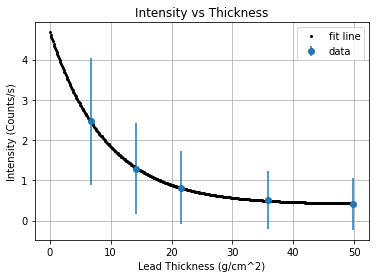

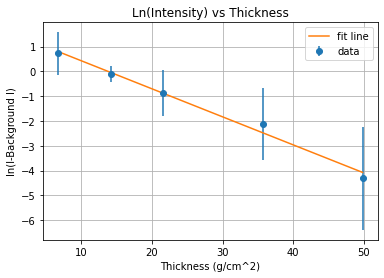

2
0.0023618307978873474


In [100]:
import scipy.optimize
import scipy.stats as stat
Pb = open('/Users/evacs/Desktop/lead.txt')


ctrate,dy,dx = np.loadtxt("/Users/evacs/Desktop/lead.txt", comments="#", delimiter="\t", unpack=True)
print(ctrate,dy,dx)





def Curve(x, A,B,C): 
    return A*np.exp(-x*B)+C

xdata = np.linspace(0,50,400)

parms, covariance = scipy.optimize.curve_fit(Curve,dx,ctrate,sigma=dy,p0=None,absolute_sigma=1)

for i in range(0,len(parms)):
    print('param' ,i,' = ',parms[i], '+/-', np.sqrt(covariance[i,i]))

fitline= Curve(dx, *parms)


chisq = sum( (ctrate-fitline)**2 / dy**2 )
chisq2 = sum( (ctrate-fitline)**2 / fitline )

dof = len(dx)-len(parms)

chisq_reduced = chisq/float(dof)

print('Chi-square, degrees of freedom, reduced chi-square: ',chisq,dof,chisq_reduced)
print('p-test value : ',1.-stat.chi2.cdf(chisq,df=dof))

print(dof)

print(chisq2)

plt.errorbar(dx,ctrate,yerr=dy,fmt='o',ls=None, label='data')
plt.plot(xdata, Curve(xdata, *parms), "ko", markersize=2 ,label="fit line")
plt.title('Intensity vs Thickness')
plt.grid()
plt.legend()
plot_xlabel = 'Lead Thickness (g/cm^2)'
plot_ylabel = 'Intensity (Counts/s)'
plt.xlabel(plot_xlabel)
plt.ylabel(plot_ylabel)
plt.show()


linear = open('/Users/evacs/Desktop/linear.txt')
ln,unc,thick = np.loadtxt("/Users/evacs/Desktop/linear.txt", comments="#", delimiter="\t", unpack=True)
m, b = np.polyfit(thick, ln,1)



plt.errorbar(thick,ln,yerr=unc,fmt='o',ls=None, label='data')
plt.plot(thick, m*thick+b,label="fit line")
plt.title('Ln(Intensity) vs Thickness')
plt.grid()
plt.legend()
plot_xlabel = 'Thickness (g/cm^2)'
plot_ylabel = 'ln(I-Background I)'
plt.xlabel(plot_xlabel)
plt.ylabel(plot_ylabel)
plt.show()
print(dof)
print(chisq2)


bgcounts = 1185
bgtime= 2999
bgrate= bgcounts/bgtime

s1l= 10.85
s1w= 9.989
s1mass= 680

s2l= 10.175
s2w= 10.278
s2mass= 776

s3l= 10.304
s3w= 10.352
s3mass= 784

s4l= 10.22
s4w= 10.214 
s4mass= 1487

s5l= 10.279 
s5w= 10.382
s5mass= 1498

no=
notime=
s1counts= 1022
s1time= 415
s12counts= 1002
s12time=777
s123counts=1010
s123time=1233
s1234counts=1010
s1234time=1958
s12345counts=1069
s12345time=2617

l = np.array([s1l,s2l,s3l,s4l,s5l])
w = np.array([s1w,s2w,s3w,s4w,s5w])
mass = np.array([s1mass,s2mass,s3mass,s4mass,s5mass])
area= l*w
deltax=mass/area
rho = np.cumsum(deltax)
counts = np.array([s1counts,s2counts, s3counts, s4counts, s5counts])
time = np.array([s1time,s2time,s3time,s4time,s5time])
I=counts/time
I_no_bg = I-bgrate
ln_I_no_bg=np.log(I_no_bg)

sigmacounts = np.sqrt(counts)
sigmatime = 1.0
sigmaI = np.sqrt(sigmacounts**2/time**2+sigmatime**2*counts**2/time**4)
sigmathick = np.sqrt(sigmamass**2/are**2+sigmaarea**2*mass**2/area**4)


In [7]:
#zshield